In [1]:
import acquire as a
import prepare as p
import explore as e

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, f_oneway

In [2]:
zillow = a.acquire_zillow()

Using cached csv


In [3]:
train, validate, test = p.prepare_zillow(zillow)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/brandynwaterman/codeup-data-science/regression_project/prepare.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2017 - df.yearbuilt


In [4]:
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
33000,3.0,2.0,1513.0,5867.0,208924.0,70,1,0,0
41488,3.0,2.0,1673.0,7424.0,860140.0,72,1,0,0
20794,2.0,2.0,1626.0,8933.0,79935.0,65,1,0,0
14842,3.0,1.5,1266.0,1770.0,335032.0,44,0,1,0
24140,4.0,3.0,2786.0,7527.0,872126.0,20,1,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23021 entries, 33000 to 43649
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    23021 non-null  float64
 1   bathrooms   23021 non-null  float64
 2   house_area  23021 non-null  float64
 3   lot_area    23021 non-null  float64
 4   tax_value   23021 non-null  float64
 5   age         23021 non-null  int64  
 6   fips_06037  23021 non-null  uint8  
 7   fips_06059  23021 non-null  uint8  
 8   fips_06111  23021 non-null  uint8  
dtypes: float64(5), int64(1), uint8(3)
memory usage: 1.3 MB


In [6]:
cats = [col for col in train.columns if (train[col].dtype not in ['float', 'int'])]

In [7]:
conts = [col for col in train.columns if (col not in cats)]

In [8]:
cats

['fips_06037', 'fips_06059', 'fips_06111']

In [9]:
conts

['bedrooms', 'bathrooms', 'house_area', 'lot_area', 'tax_value', 'age']

<AxesSubplot:>

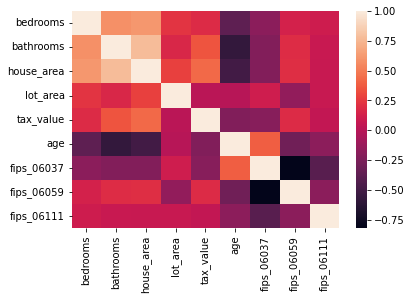

In [10]:
corr = train.corr()
sns.heatmap(corr)

In [11]:
def linear_tests(train, conts):
    for col in conts:
        sns.jointplot(y='tax_value', x=col, data=train, kind='scatter')
        plt.xlabel= (f'{col}')
        plt.ylabel= 'Tax Value'
        plt.show()
        
        sns.lmplot(x=col, y='tax_value', data=train, scatter=True, hue=None, col=None)
        plt.xlabel= (f'{col}')
        plt.ylabel= 'Tax Value'
        plt.title=(f'{col} by Tax Value')
        plt.show()
        
        print(f'H0: There is no linear relationship between {col} and tax value.')
        print(f'HA: There is a linear relationship between {col} and tax value.')
        print('----------------------------------------------------------------')
        alpha = .05
        r, p = pearsonr(train[col], train.tax_value)
        if p < alpha:
            print('We reject the null hypothesis.')
        else:
            print('We fail to reject the null hypothesis.')

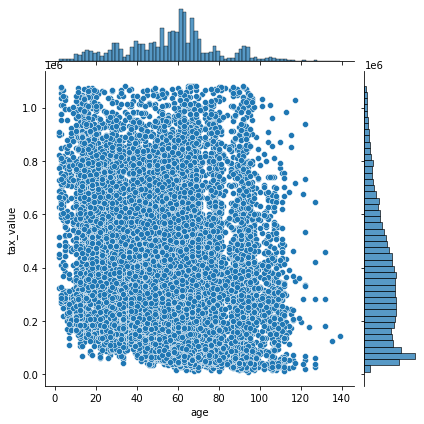

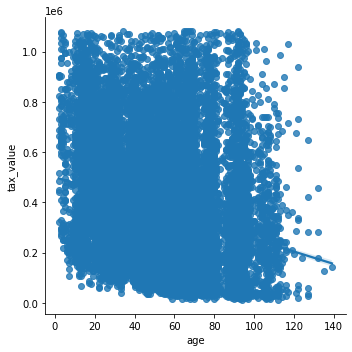

H0: There is no linear relationship between age and tax value.
HA: There is a linear relationship between age and tax value.
----------------------------------------------------------------
We reject the null hypothesis.


In [12]:
linear_tests(train, ['age'])

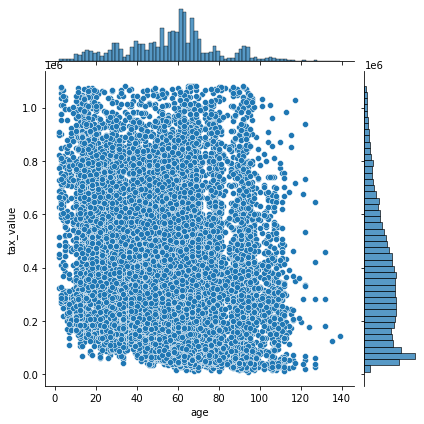

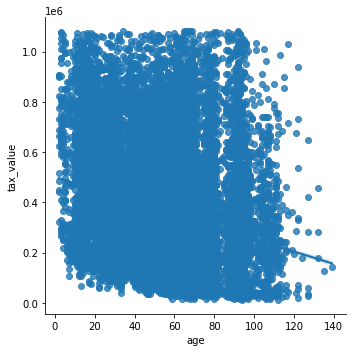

H0: There is no linear relationship between age and tax value.
HA: There is a linear relationship between age and tax value.
----------------------------------------------------------------
p-value: 1.2086289842272746e-272
With a p-value below our established alpha we reject the null hypothesis.


In [13]:
e.linear_tests(train, ['age'])

In [14]:
tax37 = train[['tax_value', 'fips_06037']]
tax37 = tax37[tax37.fips_06037 == 1]
tax59 = train[['tax_value', 'fips_06059']]
tax59 = tax59[tax59.fips_06059 == 1]
tax11 = train[['tax_value', 'fips_06111']]
tax11 = tax11[tax11.fips_06111 == 1]

In [15]:
def cat_hists(train, cats):
    for col in cats:
        h = train[['tax_value', col]]
        h = h[h[col] == 1]
        hg = sns.histplot(data=h.tax_value)
        hg.set(xlabel='Tax Value', ylabel='Quantity of Houses', title=(f'{col}'))
        plt.show()

[Text(0.5, 0, 'Tax Value'),
 Text(0, 0.5, 'Quantity of Houses'),
 Text(0.5, 1.0, 'FIP 06037')]

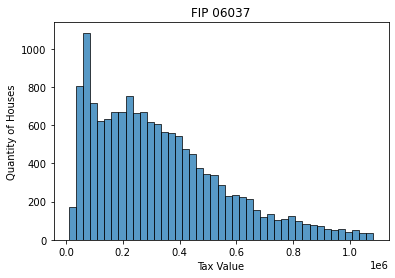

In [16]:
f37 = sns.histplot(data=tax37.tax_value)
f37.set(xlabel='Tax Value', ylabel='Quantity of Houses', title='FIP 06037')

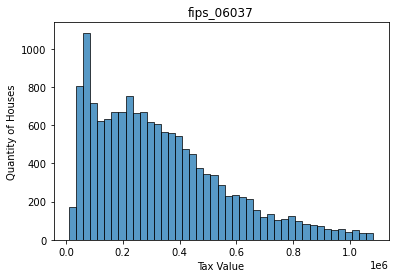

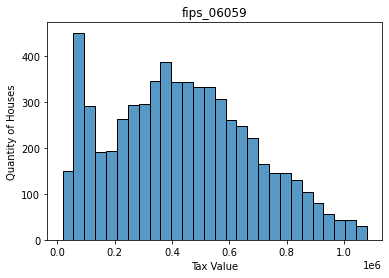

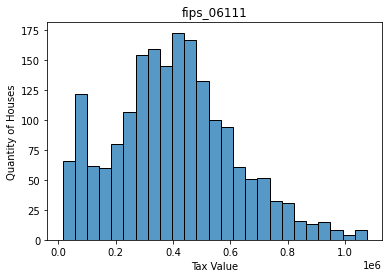

H0: The tax value means of the three fips locations are all equal.
HA: The tax value means of the three fips locations are not equal.
------------------------------------------------------------------
p-value: 2.0616311242234306e-215
With a p-value below our established alpha we reject the null hypothesis.


In [17]:
e.cat_hists(train, cats)